## Data Set up and Prep

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/US Wind Turbine Database.csv")

In [8]:
df.head(5)

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_rsa,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029.0,251 Wind,1987.0,...,NaN,NaN,0.0,NaN,2.0,3.0,5/8/2018,Digital Globe,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029.0,251 Wind,1987.0,...,NaN,NaN,0.0,NaN,2.0,3.0,5/8/2018,Digital Globe,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029.0,251 Wind,1987.0,...,NaN,NaN,0.0,NaN,2.0,3.0,5/8/2018,Digital Globe,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,2017.0,...,12271.85,150.0,0.0,NaN,3.0,3.0,7/23/2017,Digital Globe,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,2017.0,...,12271.85,150.0,0.0,NaN,3.0,3.0,5/13/2017,Digital Globe,-93.623009,41.881470


In [9]:
df.drop(['p_year', 'retrofit','retrofit_year', 't_conf_atr','t_img_date','t_img_srce'], axis=1, inplace=True)

In [10]:
df.head(5)

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_tnum,...,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_loc,xlong,ylat
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029.0,251 Wind,194.0,...,Vestas,NaN,95.0,NaN,NaN,NaN,NaN,3.0,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029.0,251 Wind,194.0,...,Vestas,NaN,95.0,NaN,NaN,NaN,NaN,3.0,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029.0,251 Wind,194.0,...,Vestas,NaN,95.0,NaN,NaN,NaN,NaN,3.0,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,10.0,...,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,10.0,...,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,3.0,-93.623009,41.881470


In [11]:
df.drop(['p_tnum', 't_model','t_hh', 't_rd','t_rsa','t_ttlh'], axis=1, inplace=True)

In [12]:
df.shape

(16525, 15)

In [13]:
df.head(5)

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_cap,t_manu,t_cap,t_conf_loc,xlong,ylat
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.623009,41.881470


In [14]:
df = df.rename(columns={'t_state': 'State', 't_county': 'County','t_manu': 'Manufacturer', 'xlong': 'Longitude', 'ylat': 'Latitude'})

In [15]:
df = df.rename(columns={'case_id': 'Case ID', 'usgs_pr_id': 'Usages per ID','p_name': 'Company'})

In [16]:
df.columns

Index(['Case ID', 'faa_ors', 'faa_asn', 'Usages per ID', 'eia_id', 'State',
       'County', 't_fips', 'Company', 'p_cap', 'Manufacturer', 't_cap',
       't_conf_loc', 'Longitude', 'Latitude'],
      dtype='object')

In [17]:
df.head()

,Case ID,faa_ors,faa_asn,Usages per ID,eia_id,State,County,t_fips,Company,p_cap,Manufacturer,t_cap,t_conf_loc,Longitude,Latitude
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.623009,41.881470


In [18]:
df = df.rename(columns={'Usages per ID': 'Output'})

## Data Analysis

In [19]:
df.head()

,Case ID,faa_ors,faa_asn,Output,eia_id,State,County,t_fips,Company,p_cap,Manufacturer,t_cap,t_conf_loc,Longitude,Latitude
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.623009,41.881470


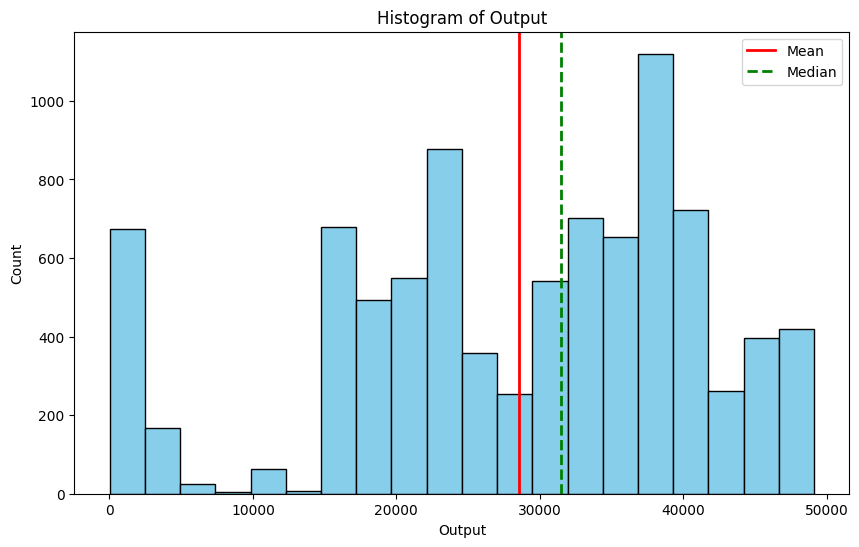

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Output'], bins=20, color='skyblue', edgecolor='black')

mean_value = df['Output'].mean()
median_value = df['Output'].median()

plt.axvline(mean_value, color='red', linestyle='solid', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Histogram of Output')
plt.legend()

plt.show()

In [21]:
state_avg_output = df.groupby('State')['Output'].mean().reset_index().dropna().sort_values('Output', ascending=False)
state_avg_output = state_avg_output.round(2)
print("Average Output by State")
print(state_avg_output)

Average Output by State
   State    Output
39    WY  47572.22
38    WV  46504.59
37    WI  46263.42
36    WA  44872.93
35    VT  44371.00
33    UT  44320.50
13    MI  42928.27
31    TN  38793.50
30    SD  38522.16
27    PA  37930.20
32    TX  37831.31
25    OK  37312.26
22    NM  36440.20
24    OH  35827.05
21    NJ  34129.00
19    NE  34034.89
18    ND  33224.98
9     KS  32538.40
16    MT  29926.50
15    MO  29798.28
14    MN  28856.48
10    MA  27559.80
12    ME  26959.00
11    MD  26763.50
7     IL  23190.96
6     ID  21505.42
5     IA  19621.98
4     HI  18167.00
3     CO  17091.24
2     CA  11616.82
0     AK   8461.71
26    OR    989.01


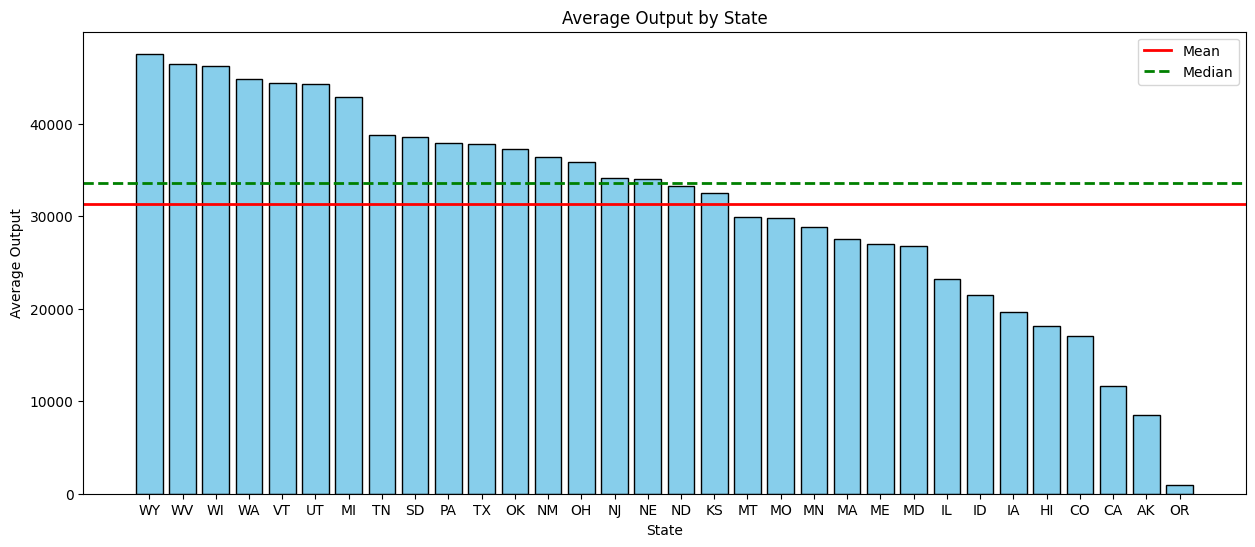

In [22]:
plt.figure(figsize=(15,6))
plt.bar(state_avg_output['State'],state_avg_output['Output'], color='skyblue', edgecolor='black')

mean_value = state_avg_output['Output'].mean()
plt.axhline(mean_value, color='red', linestyle='solid', linewidth=2, label='Mean')

median_value = state_avg_output['Output'].median()
plt.axhline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('State')
plt.ylabel('Average Output')
plt.title('Average Output by State')

plt.legend()
plt.show()


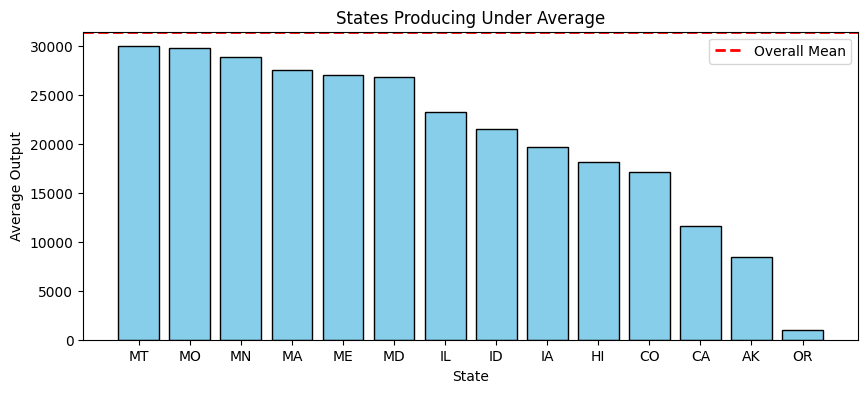

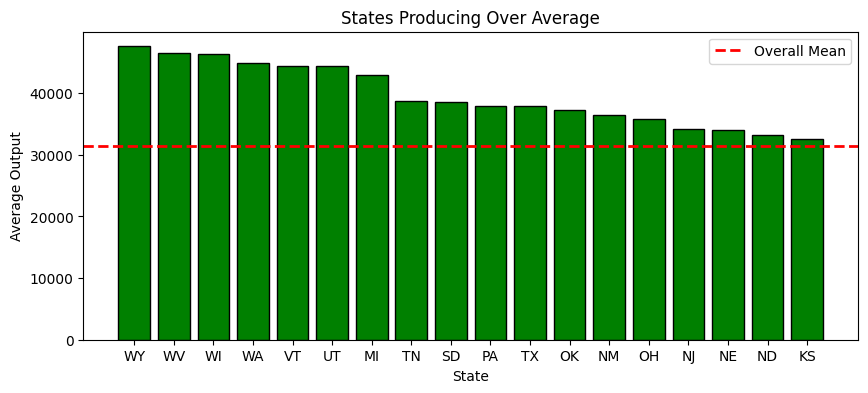

In [33]:
overall_mean = state_avg_output['Output'].mean()

below_avg_states = state_avg_output[state_avg_output['Output']< overall_mean]
above_avg_states = state_avg_output[state_avg_output['Output']>= overall_mean]


plt.figure(figsize=(10, 4))
plt.bar(below_avg_states['State'], below_avg_states['Output'], color='skyblue', edgecolor='black')
plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.xlabel('State')
plt.ylabel('Average Output')
plt.title('States Producing Under Average')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(above_avg_states['State'], above_avg_states['Output'], color='green', edgecolor='black')
plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.xlabel('State')
plt.ylabel('Average Output')
plt.title('States Producing Over Average')
plt.legend()
plt.show()


In [32]:
print(overall_mean)

31372.643125


<ipython-input-25-ce3b9fe51cd7>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


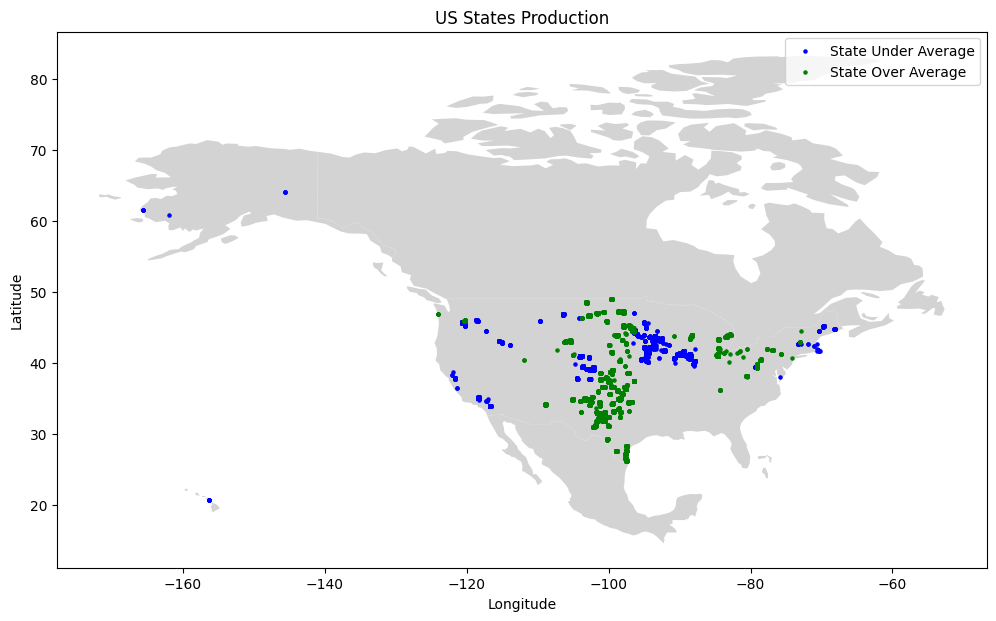

In [25]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_bbox = [-125, 24, -65, 49]

fig, ax = plt.subplots(figsize=(12, 8))
world.cx[usa_bbox[0]:usa_bbox[2], usa_bbox[1]:usa_bbox[3]].plot(ax=ax, color='lightgrey')

geo_df[geo_df['State'].isin(below_avg_states['State'])].plot(ax=ax, color='blue', label='State Under Average', markersize = 5)
geo_df[geo_df['State'].isin(above_avg_states['State'])].plot(ax=ax, color='green', label='State Over Average', markersize = 5)

plt.title('US States Production')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()

In [26]:
df.head(5)

,Case ID,faa_ors,faa_asn,Output,eia_id,State,County,t_fips,Company,p_cap,Manufacturer,t_cap,t_conf_loc,Longitude,Latitude
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029.0,251 Wind,18.43,Vestas,95.0,3.0,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169.0,30 MW Iowa DG Portfolio,30.00,Nordex,3000.0,3.0,-93.623009,41.881470


In [27]:
companies = df.Company.nunique()
print(companies)

369


In [28]:
turbines_per_company = df.groupby('Company')['Case ID'].size().reset_index(name='Number of Turbines')
turbines_per_company = turbines_per_company.sort_values('Number of Turbines', ascending = False)
print(turbines_per_company)

                           Company  Number of Turbines
247                    Cedar Creek                 274
275                 Cheyenne Ridge                 228
229                Capricorn Ridge                 210
230      Capricorn Ridge expansion                 197
69                    Aviator Wind                 191
..                             ...                 ...
314            Coram (Tehachapi 3)                   1
197  Bureau Valley School District                   1
312         Cooper Farms Amendment                   1
202                     Byers Auto                   1
157           Bolton Valley Resort                   1

[369 rows x 2 columns]


In [29]:
turbines_per_manufacturer = df.groupby('Manufacturer')['Case ID'].size().reset_index(name='Number of Turbines')
turbines_per_manufacturer = turbines_per_manufacturer.sort_values('Number of Turbines', ascending = False)
print(turbines_per_manufacturer)

                       Manufacturer  Number of Turbines
11                          GE Wind                7942
30                           Vestas                3728
24                          Siemens                1224
12                           Gamesa                1019
17                       Mitsubishi                 963
19                           Nordex                 556
27                           Suzlon                 270
25  Siemens Gamesa Renewable Energy                 162
23                          REpower                  88
18                        NEG Micon                  67
1                           Acciona                  55
31                             Zond                  51
6                           Clipper                  34
21           Northern Power Systems                  24
3                            Alstom                  24
5        China Creative Wind Energy                  17
7                            DeWind             

In [30]:
turbine_count_by_state = df.groupby('State')['Case ID'].count().reset_index(name='Turbine Count')
turbine_count_by_state = turbine_count_by_state.sort_values('Turbine Count',ascending = False)
print(turbine_count_by_state)

   State  Turbine Count
32    TX           3631
25    OK           1550
5     IA           1300
7     IL           1235
3     CO           1184
9     KS           1079
30    SD            909
18    ND            897
2     CA            791
14    MN            516
26    OR            415
13    MI            398
22    NM            356
39    WY            293
24    OH            218
19    NE            200
27    PA            188
8     IN            173
37    WI            167
36    WA            161
16    MT            147
23    NY            113
38    WV            110
17    NC            105
6     ID            102
12    ME             83
15    MO             75
11    MD             29
10    MA             27
31    TN             18
35    VT             16
20    NH              9
4     HI              8
0     AK              8
29    RI              5
33    UT              2
34    VA              2
28    PR              2
21    NJ              1
1     AR              1


## Summary

From the Data Analysis we have determined the output of energy from wind turbines across the United States. From the time of data sourcing 43 from 50 states across the US have operational wind turbines.  The states which produce the most energy are Wyoming(WY), West Virginia(WV), and Wisconsin(WI). The states which produce the least energy are Alaska(AK), Arizona(AZ), Oregon(OR).

From 43 states 14 produce below an average of output 31372.64, with 18 states producing above average output. Texas(TX) has the largest number of turbines per state with 3631 turbines operational, yet is the 11th state when ranked according to output of energy. Across the whole dataset, manufacturer GE Wind produced the most turbines, 7942, 4214 turbines more than the second manufacturer Vestas(3728 turbines).

Final analysis revealed that companies Cedar Creek, Cheyenne Ridge, and Capricorn Ridge, all have more than 200 operational turbines across the states.